# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [4]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('breast-cancer.txt')
X = X.toarray()

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [9]:
import numpy as np

y = np.where(y == 2, -1, y)
y = np.where(y == 4, 1, y)




### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="d.png">

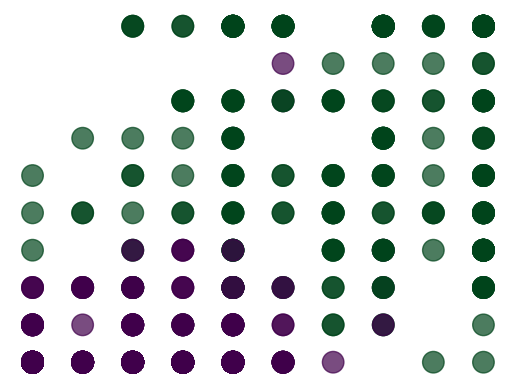

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 1], X[:, 2],s=240,c=y,cmap="PRGn",alpha=0.7)
plt.axis('off')
plt.show()
print(list(plt.colormaps))


### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [127]:
X_transpose = np.transpose(X)
XtX = np.matmul(X_transpose, X)
XtX_inv = np.linalg.inv(XtX)
XtY = np.matmul(X_transpose, y)

Beta = np.matmul(XtX_inv, XtY)

print(Beta.shape)

(10,)


### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lr1.png">

(239, 10)
(444, 10)


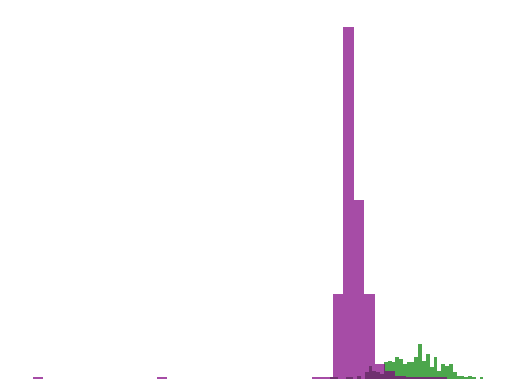

In [171]:
X_plus = X[y == 1]  
X_minus = X[y == -1] 
print(X_plus.shape)
print(X_minus.shape)

proj_plus = np.matmul(Beta, X_plus.T)
proj_minus = np.matmul(Beta, X_minus.T)

plt.hist(proj_plus, alpha=0.7, color='green',bins=40)
plt.hist(proj_minus, alpha=0.7,  color='purple',bins=40)
plt.axis("off")
plt.show()

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [148]:
predictions = np.matmul(X, Beta)

labels = np.where(predictions >= 0, 1, -1)

print("Assigned Labels:", labels)

Assigned Labels: [-1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1 -1  1
  1  1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1
  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1
 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1
  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1
 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1
 -1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1 -1 -1  1
  1  1  1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1
  1  1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1 -1  1
  1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1
  1 -1  1  1  1 -1 -1  1  1 -1  1 

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [150]:
accuracy = np.sum(labels == y) / len(y) * 100
print(accuracy)

93.85065885797951


### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [169]:

c = 100


X_transpose = np.transpose(X)
XtX = np.matmul(X_transpose, X)
XtX += (1/c) * np.identity(XtX.shape[0])  

XtX_inv = np.linalg.inv(XtX)
XtY = np.matmul(X_transpose, y)
BETA = np.matmul(XtX_inv, XtY)

print("Beta:", BETA)


predictions = np.matmul(X, BETA)
labels = np.where(predictions >= 0, 1, -1)

accuracy = np.sum(labels == y) / len(y) * 100
print(accuracy)

Beta: [-5.39151513e-07 -2.75218963e-02  1.29712200e-01  4.70722383e-02
  7.88867317e-03 -8.52446885e-02  1.00494738e-01 -5.81764418e-02
  5.61640255e-02 -3.07520706e-02]
93.85065885797951


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']